In [90]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import plotly.express as px
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [123]:
player_stats_df = pd.read_csv('player_data.csv')

In [124]:
player_stats_df.head()

,Unnamed: 0,PLAYER_ID,SEASON_ID,TEAM_ID_x,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,WEIGHT,JERSEY,TEAM_ID_y,SEASON_EXP,PTS_y,AST_y,REB_y,draft_flag,year_in_game,player_age
0,0,66,1995-96,1610612750,MIN,26.0,53,0.0,369.0,5.3,...,230.0,33,1610612750,0,2.5,0.2,1.5,False,0,50
1,1,66,1995-96,1610612750,MIN,26.0,53,0.0,369.0,5.3,...,230.0,33,1610612750,0,2.5,0.2,1.5,False,0,50
2,2,74,1994-95,1610612758,SAC,22.0,3,0.0,5.0,0.0,...,181.0,5,1610612758,0,0.0,0.3,0.0,False,0,48
3,3,74,1994-95,1610612758,SAC,22.0,3,0.0,5.0,0.0,...,181.0,5,1610612758,0,0.0,0.3,0.0,False,0,48
4,4,132,1994-95,1610612744,GOS,23.0,41,6.0,395.0,4.6,...,195.0,50,1610612744,0,4.1,0.4,1.4,True,0,49


In [125]:
player_stats_df.shape

(23184, 39)

In [126]:
player_stats_df = player_stats_df.drop(['Unnamed: 0','TEAM_ID_y','player_age','JERSEY','BIRTHDATE','year_in_game'], axis=1)

In [127]:
player_stats_df.convert_dtypes().dtypes   

PLAYER_ID              Int64
SEASON_ID             string
TEAM_ID_x              Int64
TEAM_ABBREVIATION     string
PLAYER_AGE             Int64
GP                     Int64
GS                     Int64
MIN                    Int64
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB_x                float64
AST_x                float64
STL                  float64
BLK                  float64
TOV                  float64
PF                   float64
PTS_x                float64
HEIGHT               float64
WEIGHT               float64
SEASON_EXP             Int64
PTS_y                float64
AST_y                float64
REB_y                float64
draft_flag           boolean
dtype: object

In [128]:
player_stats_df.isnull().sum()

PLAYER_ID               0
SEASON_ID               0
TEAM_ID_x               0
TEAM_ABBREVIATION       0
PLAYER_AGE              0
GP                      0
GS                   5836
MIN                     0
FGM                     0
FGA                     0
FG_PCT                 11
FG3M                 5350
FG3A                 5350
FG3_PCT              5607
FTM                     0
FTA                     0
FT_PCT                137
OREB                 3401
DREB                 3401
REB_x                   0
AST_x                   0
STL                  3401
BLK                  3401
TOV                  4610
PF                      0
PTS_x                   0
HEIGHT                  0
WEIGHT                  0
SEASON_EXP              0
PTS_y                   0
AST_y                   0
REB_y                   0
draft_flag              0
dtype: int64

In [129]:
player_stats_df = player_stats_df.dropna()

In [130]:
y=player_stats_df[['PLAYER_ID', 'SEASON_ID', 'TEAM_ID_x','TEAM_ABBREVIATION']]

In [131]:
x = player_stats_df.loc[:, ~player_stats_df.columns.isin(['PLAYER_ID', 'SEASON_ID', 'TEAM_ID_x','TEAM_ABBREVIATION'])]

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [133]:
X_train

,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,TOV,PF,PTS_x,HEIGHT,WEIGHT,SEASON_EXP,PTS_y,AST_y,REB_y,draft_flag
12443,27.0,2,0.0,10.0,3.6,7.2,0.500,0.0,0.0,0.000,...,0.0,7.2,7.2,77.0,200.0,4,10.9,1.6,2.8,True
12673,26.0,50,13.0,893.0,7.6,13.8,0.553,0.0,0.0,0.000,...,4.2,7.6,19.3,82.0,235.0,9,11.7,1.2,5.5,True
17887,23.0,14,0.0,87.0,1.7,4.2,0.400,0.0,0.0,0.000,...,1.2,5.8,5.8,83.0,248.0,6,1.3,0.1,2.3,False
12254,23.0,18,0.0,92.0,3.1,12.9,0.242,0.4,4.3,0.091,...,3.5,2.7,9.4,79.0,195.0,1,3.3,1.1,0.9,True
17943,25.0,31,0.0,241.0,4.8,12.7,0.376,0.7,3.1,0.238,...,1.5,2.5,11.1,80.0,205.0,3,7.5,1.4,2.1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17082,27.0,71,2.0,584.0,7.0,15.1,0.465,0.0,0.1,0.000,...,3.5,6.8,17.8,82.0,220.0,5,4.8,0.2,3.1,True
17952,27.0,42,32.0,713.0,4.1,9.1,0.453,0.0,0.0,0.000,...,1.9,4.6,10.0,81.0,250.0,6,4.5,0.5,4.3,True
6196,41.0,58,4.0,1026.0,4.0,9.9,0.403,2.0,5.8,0.345,...,1.3,3.4,11.0,78.0,220.0,22,16.7,3.1,4.3,True
1656,26.0,25,10.0,310.0,4.1,8.6,0.473,0.0,0.1,0.000,...,2.0,4.9,10.7,84.0,245.0,4,3.1,0.3,2.6,True


fraction of the total variance in the training data is explained by the first k principal components: 

k = 1: cumulative explained variance: 0.9993820894609348

k = 2: cumulative explained variance: 0.9997132185161646

k = 3: cumulative explained variance: 0.9998343197816495

k = 4: cumulative explained variance: 0.9998816722512105

k = 5: cumulative explained variance: 0.9999190387692166

k = 10: cumulative explained variance: 0.9999774682114377

k = 15: cumulative explained variance: 0.9999945978735812

k = 20: cumulative explained variance: 0.9999993160482035



Text(0.5, 1.0, 'Variance explained by PCA')

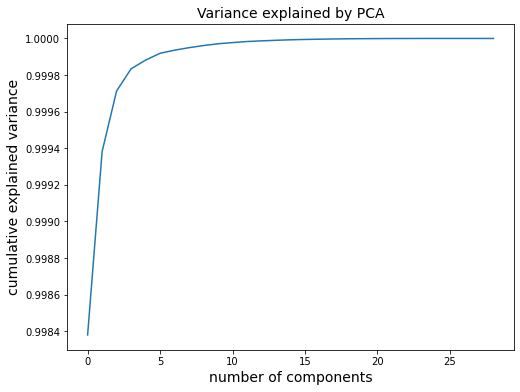

In [134]:
pca = PCA().fit(X_train)

print('fraction of the total variance in the training data is explained by the first k principal components: \n')
for k in [1, 2, 3, 4, 5, 10, 15, 20]:  
    var = np.cumsum(pca.explained_variance_ratio_)[k]
    print('k = ' + str(k) + ': cumulative explained variance: ' + str(var) + '\n')

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components', fontsize = 14)
plt.ylabel('cumulative explained variance', fontsize = 14)
plt.title('Variance explained by PCA', fontsize = 14)

Text(0.5, 1.0, 'Elbow Plot')

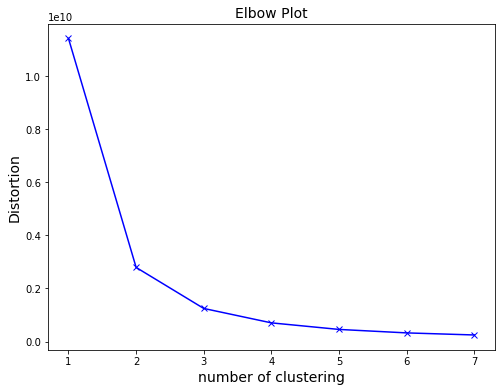

In [135]:
distortions = []
for i in range(1,8):
    km = KMeans (
        n_clusters=i, 
        init='random', 
        max_iter = 300, 
        n_init=10, 
        random_state = 0
    ).fit(X_train)
    distortions.append(km.inertia_)
    
plt.figure(figsize=(8,6))
plt.plot(range(1,8), distortions, 'bx-')
plt.xlabel('number of clustering', fontsize = 14)
plt.ylabel('Distortion', fontsize = 14)
plt.title('Elbow Plot', fontsize = 14)

In [136]:
km = KMeans (
        n_clusters=3, 
        init='random', 
        max_iter = 300, 
        n_init=10, 
        random_state = 0
    ).fit(X_train)
#y_km = km.fit_predict(X_test)
y_km_train = km.fit_predict(X_train)
y_km_test = km.fit_predict(X_test)

In [137]:
len(y_km_train)+len(y_km_test)

17090

In [138]:
Y_train['cluster'] = y_km_train
Y_test['cluster'] = y_km_test
cluster_data = pd.concat([Y_train,Y_test])
cluster_data

<ipython-input-138-00fa9745b356>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train['cluster'] = y_km_train
<ipython-input-138-00fa9745b356>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test['cluster'] = y_km_test


,PLAYER_ID,SEASON_ID,TEAM_ID_x,TEAM_ABBREVIATION,cluster
12443,77054,1991-92,1610612741,CHI,2
12673,77134,1983-84,1610612758,KCK,0
17887,101204,2005-06,1610612738,BOS,2
12254,77002,1986-87,1610612745,HOU,2
17943,200747,2009-10,1610612747,LAL,2
...,...,...,...,...,...
2723,236,1994-95,1610612751,NJN,1
6167,1711,2002-03,1610612742,DAL,0
20841,203382,2017-18,1610612738,BOS,0
15564,78087,1982-83,1610612754,IND,1


In [139]:
player_cluster = pd.merge(player_stats_df, cluster_data, on=["PLAYER_ID", "SEASON_ID","TEAM_ID_x","TEAM_ABBREVIATION"])

In [146]:
player_cluster['cluster'].describe()

count    17846.000000
mean         1.123445
std          0.837649
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: cluster, dtype: float64

In [154]:
player_cluster[player_cluster['cluster']==0].describe()

,PLAYER_ID,TEAM_ID_x,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,TOV,PF,PTS_x,HEIGHT,WEIGHT,SEASON_EXP,PTS_y,AST_y,REB_y,cluster
count,5.295000e+03,5.295000e+03,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,...,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.0
mean,1.945387e+05,1.451224e+09,27.481964,62.635316,22.516714,1351.927479,5.260038,11.566648,0.456415,0.830066,...,2.096431,3.614485,13.790992,78.834183,219.775449,9.538999,9.360283,2.138546,4.029632,0.0
std,4.260576e+05,4.809905e+08,4.311975,13.703873,19.101781,312.390073,1.476935,3.073927,0.055346,0.928078,...,0.692703,1.151924,3.842863,3.653546,28.318717,4.270724,4.515933,1.587286,2.125125,0.0
min,7.000000e+00,0.000000e+00,18.000000,22.000000,0.000000,829.000000,0.900000,1.900000,0.282000,0.000000,...,0.300000,0.900000,2.300000,65.000000,133.000000,0.000000,0.000000,0.100000,0.000000,0.0
25%,1.496000e+03,1.610613e+09,24.000000,53.000000,5.000000,1078.000000,4.200000,9.400000,0.419000,0.000000,...,1.600000,2.800000,11.100000,76.000000,200.000000,7.000000,6.200000,1.000000,2.400000,0.0
50%,7.641800e+04,1.610613e+09,27.000000,65.000000,18.000000,1345.000000,5.200000,11.400000,0.450000,0.500000,...,2.000000,3.500000,13.600000,79.000000,220.000000,10.000000,8.300000,1.700000,3.600000,0.0
75%,2.015830e+05,1.610613e+09,30.000000,74.000000,37.000000,1624.000000,6.200000,13.500000,0.487000,1.500000,...,2.500000,4.300000,16.100000,82.000000,240.000000,13.000000,11.700000,2.900000,5.100000,0.0
max,1.629740e+06,1.610613e+09,82.000000,85.000000,83.000000,1947.000000,10.900000,24.100000,0.763000,4.700000,...,5.300000,10.600000,33.000000,91.000000,325.000000,22.000000,31.800000,11.200000,14.200000,0.0


In [155]:
player_cluster[player_cluster['cluster']==1].describe()

,PLAYER_ID,TEAM_ID_x,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,TOV,PF,PTS_x,HEIGHT,WEIGHT,SEASON_EXP,PTS_y,AST_y,REB_y,cluster
count,5.053000e+03,5.053000e+03,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,...,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.0
mean,1.718110e+05,1.511483e+09,27.187809,58.639224,43.253711,1725.333861,5.722640,12.665466,0.450328,0.793746,...,2.317831,3.489828,15.153097,78.909559,219.860875,9.899070,10.901385,2.553552,4.343103,1.0
std,4.021264e+05,3.871202e+08,4.799313,27.012743,33.681037,1075.921939,2.225317,3.969121,0.094281,1.346235,...,1.080600,2.143918,5.935622,3.623777,28.165749,5.245186,6.256687,2.044798,2.590504,0.0
min,7.000000e+00,0.000000e+00,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,65.000000,133.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9.560000e+02,1.610613e+09,24.000000,37.000000,2.000000,493.000000,4.400000,10.100000,0.418000,0.000000,...,1.700000,2.500000,11.700000,76.000000,200.000000,6.000000,5.900000,1.000000,2.400000,1.0
50%,2.891000e+03,1.610613e+09,26.000000,73.000000,56.000000,2134.000000,5.600000,12.500000,0.457000,0.300000,...,2.300000,3.100000,14.900000,79.000000,220.000000,11.000000,10.600000,2.000000,3.800000,1.0
75%,2.011420e+05,1.610613e+09,30.000000,80.000000,76.000000,2570.000000,6.900000,15.000000,0.496000,1.400000,...,2.800000,4.000000,18.300000,82.000000,240.000000,14.000000,14.700000,3.500000,6.000000,1.0
max,1.629752e+06,1.610613e+09,93.000000,85.000000,82.000000,3533.000000,69.700000,69.700000,1.000000,69.700000,...,18.000000,74.500000,209.000000,91.000000,330.000000,22.000000,31.800000,11.200000,14.200000,1.0


In [156]:
player_cluster[player_cluster['cluster']==2].describe()

,PLAYER_ID,TEAM_ID_x,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,TOV,PF,PTS_x,HEIGHT,WEIGHT,SEASON_EXP,PTS_y,AST_y,REB_y,cluster
count,7.498000e+03,7.498000e+03,7498.000000,7498.000000,7498.000000,7498.000000,7498.000000,7498.000000,7498.000000,7498.000000,...,7498.000000,7498.000000,7498.00000,7498.000000,7498.000000,7498.000000,7498.000000,7498.000000,7498.000000,7498.0
mean,2.705939e+05,1.485596e+09,26.655642,30.007602,9.803548,540.238730,4.816791,11.561843,0.414709,0.693598,...,2.310469,4.287223,12.70124,79.003734,219.281275,6.454921,6.819205,1.516871,3.045866,2.0
std,5.167893e+05,4.309865e+08,4.208721,23.375565,21.292633,734.452757,2.317816,4.209707,0.129330,0.982851,...,1.730751,2.519761,5.83974,3.653235,28.262536,5.045601,5.076608,1.515274,2.122558,0.0
min,7.000000e+00,0.000000e+00,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,65.000000,133.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,1.887250e+03,1.610613e+09,24.000000,10.000000,0.000000,94.000000,3.500000,8.900000,0.364000,0.000000,...,1.500000,2.800000,9.40000,76.000000,196.000000,2.000000,3.100000,0.500000,1.500000,2.0
50%,7.730000e+04,1.610613e+09,26.000000,25.000000,0.000000,292.000000,4.700000,11.250000,0.423000,0.100000,...,2.100000,3.900000,12.30000,79.000000,220.000000,6.000000,5.400000,1.000000,2.500000,2.0
75%,2.022270e+05,1.610613e+09,29.000000,44.000000,6.000000,616.000000,6.000000,13.800000,0.479000,1.200000,...,2.900000,5.300000,15.50000,82.000000,240.000000,10.000000,9.000000,2.000000,4.000000,2.0
max,1.629760e+06,1.610613e+09,94.000000,84.000000,83.000000,3424.000000,36.000000,48.000000,1.000000,11.600000,...,36.000000,41.100000,108.00000,91.000000,325.000000,22.000000,31.800000,11.200000,14.200000,2.0


Cluster 0:
GP: Game played: cluster 0 more experience
GS: game started: cluster 0 GS to GP is lower
Cluster 1:
GP: Game played: cluster 1 more experience
GS: game started: cluster 1 GS to GP is higher
Cluster 2: 
GP: Game played: cluster 2 has less
GS: game started: cluster 2 has less
FG_PCT: field goal percent lower than the other 2 clusters


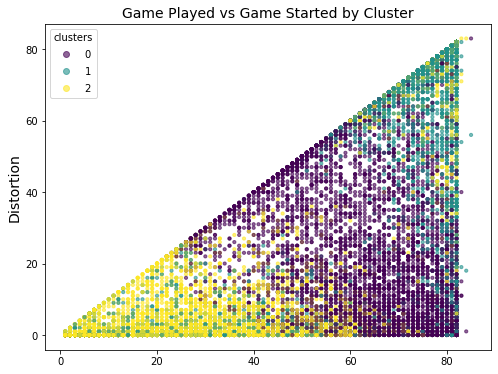

In [175]:
fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(player_cluster.GP, player_cluster.GS, c=player_cluster.cluster, alpha = 0.6, s=10)
ax.set_title('Game Played vs Game Started by Cluster', fontsize = 14)
ax.set_ylabel('Game Started', fontsize = 14)
ax.set_xlabel('Game Played', fontsize = 14)
ax.legend(*sc.legend_elements(), title='clusters')

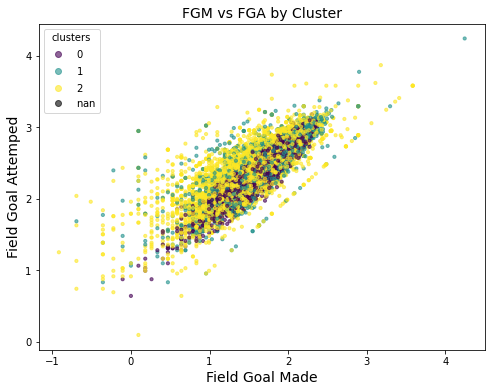

In [183]:
fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(np.log(player_cluster.FGM), np.log(player_cluster.FGA), c=player_cluster.cluster, alpha = 0.6, s=10)
ax.set_title('FGM vs FGA by Cluster', fontsize = 14)
ax.set_ylabel('Field Goal Attemped', fontsize = 14)
ax.set_xlabel('Field Goal Made', fontsize = 14)
ax.legend(*sc.legend_elements(), title='clusters')

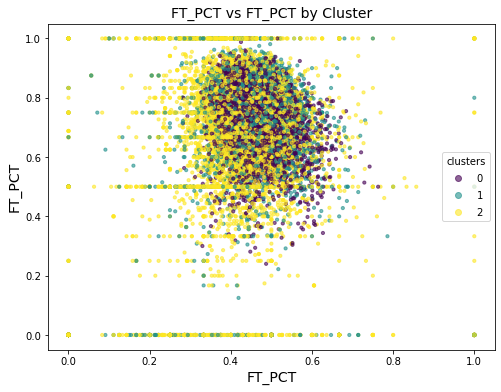

In [190]:
fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(player_cluster.FG_PCT, player_cluster.FT_PCT, c=player_cluster.cluster, alpha = 0.6, s=10)
ax.set_title('FT_PCT vs FT_PCT by Cluster', fontsize = 14)
ax.set_ylabel('FT_PCT', fontsize = 14)
ax.set_xlabel('FT_PCT', fontsize = 14)
ax.legend(*sc.legend_elements(), title='clusters')

In [147]:
player_cluster.to_csv('player_cluster.csv', sep=',')

In [ ]:
FG3M                 5350
FG3A                 5350
FG3_PCT              5607
FTM                     0
FTA                     0
FT_PCT                137
OREB                 3401
DREB                 3401
REB_x                   0
AST_x                   0
STL                  3401
BLK                  3401
TOV                  4610
PF                      0
PTS_x                   0
HEIGHT                  0
WEIGHT                  0
SEASON_EXP              0
PTS_y                   0
AST_y                   0
REB_y       